# 3D Projective Geometry
###### Objective: The objective is to add the color index in a 2D image, this color index indicates the depth of each point in this image. We will use transformations provided by a dataset to project a 3D point cloud on the image plane of a color camera (the camera takes the image, then the lidar create a 3D point cloud). This allows to know the depth of a set of 2d points in the image. The color of each point indicates the depth of that point.



Preliminary step : 
- We are interested in the RAW section of the dataset from the following link: http://www.cvlibs.net/datasets/kitti/. 
- We have installed pykitti on our python distribution.

List of steps to perform :
1.   Import the dataset, then read an image from the camera (camera 2) and the matrix of 3D lidar points
2.   Remove the lidar points that may be behind the camera (that are less than a 5 meter threshold in the x-axis (for lidar, 
     the direction of the x-axis is a forward direction)), i.e., eliminate the lidar points that are behind the 180° view area      of the camera. 
3.   Lidar to camera transformation 
4.   Projection into the camera image
5.   Filtering of the projection points that have coordinates outside the range of the image size, then displaying 
6.   Colorization of the points using the third z-coordinate of the lidar matrix

Lidar transformation and projection on a camera (3D to 2D):
We will use the RAW section of the dataset, the date sequence = "2011_09_26" and drive = "0009".

In [1]:
## Importing the numpy, matplotlib, and pykitti libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pykitti

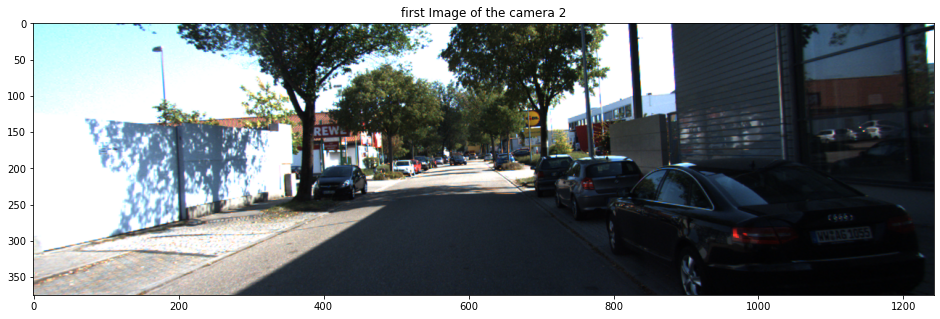

(Text(0.5, 1.0, 'first Image of the camera 2'), None)

In [2]:
## Importing the dataset
basedir = 'C://Users//KITTI_SAMPLE//RAW'
dataset = pykitti.raw(basedir, date = '2011_09_26', drive = '0009', frames=range(0, 50, 1))

## Read the 1st image of the camera_2 and the matrix of 3D lidar points
cam2 = dataset.get_cam2(0)
lidar = dataset.get_velo(0)

# Show cam2 image
plt.figure(figsize=(20, 5)), plt.imshow(cam2)
plt.title('first Image of the camera 2'), plt.show()

In [3]:
## Remove the points behind the camera (x < thresh = 5m)
lidar = lidar[lidar[:,0] > 5]

# Normally the 4th column of the lidar matrix is for the reflectance "r", but in this work we will use this column to switch 
# to homogeneous coordinates by transforming it to values of 1
lidar[:,3] = 1 # transform the last column to values of 1

In [4]:
## Transformation from Lidar to camera2
K = dataset.calib.K_cam2   # 𝐊 is the intrinsic matrix of camera 2 (size = 3x3)
LidarToCam2 = dataset.calib.T_cam2_velo   # Transformation matrix from lidar to camera_2 (size = 4x4)
LidarToCam2_del = np.delete(LidarToCam2, 3, 0)   # Elimination of the last row of this transformation matrix (size = 3x4)
T_LidarToCam2 = K @ LidarToCam2_del @ lidar.T    # Lidar transformation to camera_2 (size = (3x3).(3x4).(4x(lidar.shape[1]) = 3x(lidar.shape[1]))

In [5]:
## Projection in the camera image (3D -> 2D)
#  In this part, we divided the coordinates of x and y (1st and 2nd line) by the one of z (by the 3rd line), for the projection 
#  in the image of the camera (from 3D to 2D), (to pass from homogeneous coordinates to Cartesian coordinates), then to transform 
#  them in integer values. We have kept the z coordinate that we will use in the last step of coloring for the depth (we have left 
#  the type "float" of the z values unchanged for the depth).

T_LidarToCam2[0,:] = (T_LidarToCam2[0,:]/T_LidarToCam2[2,:]).astype(int)
T_LidarToCam2[1,:] = (T_LidarToCam2[1,:]/T_LidarToCam2[2,:]).astype(int)
Project = T_LidarToCam2.T   # transformation of this matrix into a transposed matrix

<ipython-input-6-e9e9b4f942ed>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Project = Project[[Project[:,0] >= 0]]
<ipython-input-6-e9e9b4f942ed>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Project = Project[[Project[:,0] < np.shape(cam2)[1]]]
<ipython-input-6-e9e9b4f942ed>:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a dif

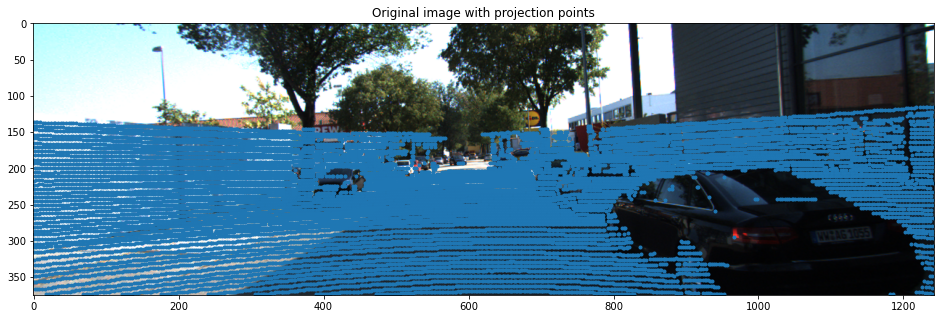

(Text(0.5, 1.0, 'Original image with projection points'), None)

In [6]:
## Filtering of the coordinates of the projection in the image that are outside the range (in x and y) of the original image "cam2"
# Project[:,0] ∈ [0, np.shape(cam2)[1]
Project = Project[[Project[:,0] >= 0]]
Project = Project[[Project[:,0] < np.shape(cam2)[1]]]
# Project[:,1] ∈ [0, np.shape(cam2)[0][
Project = Project[[Project[:,1] >= 0]]
Project = Project[[Project[:,1] < np.shape(cam2)[0]]]

## Display of obtained/filtered projection points in the original image "cam2
plt.figure(figsize=(20, 5)), plt.imshow(cam2)
plt.plot(Project[:,0], Project[:,1],'.'), 
plt.title('Original image with projection points'), plt.show()

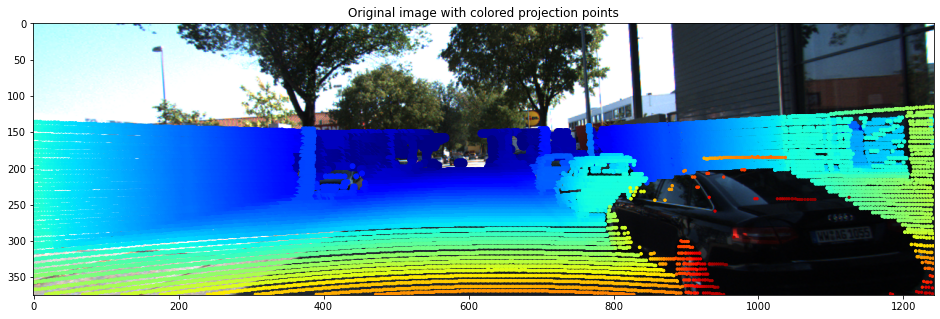

(Text(0.5, 1.0, 'Original image with colored projection points'), None)

In [7]:
# Coloring of the "depth display in the image" points using the third z coordinate of the lidar matrix kept previously. We used the 'jet' color map.
depth = Project[:,2]
fig = plt.figure(figsize=[20, 5]), plt.imshow(cam2)
sc=plt.scatter(Project[:,0], Project[:,1], depth, c=1/depth, cmap='jet')  
plt.title('Original image with colored projection points'), plt.show()